# Principles of Algorithm Design

### Final Project

_A Study in Search Algorithms_

### Students

- Pedram Peiro (9825006)
- Hamed Araab (9925003)

### Studied Algorithms

1. Linear Search
2. Jump Search
3. Binary Search
4. Ternary Search
5. Interpolation Search
6. Exponential Search
7. Fibonacci Search
8. Uniform Binary Search


### Prerequisites

- `random`: For generating random arrays in the benchmarking process.
- `timeit`: For measuring performance in the benchmarking process.
- `matplotlib.pyplot`: For plotting a specific search algorithm.
- `signal`: For smoothing out the plots.


In [1]:
import random
import timeit
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

### Linear Search


In [2]:
def linear_search(arr, target):
    for i in range(len(arr)):
        if arr[i] == target:
            return i

    return -1

### Jump Search


In [3]:
def jump_search(arr, target):
    n = len(arr)

    left = 0
    right = int(n**0.5) + 1

    while right <= n and arr[right - 1] < target:
        left = right
        right += int(n**0.5)

    for i in range(left, min(right, n)):
        if arr[i] == target:
            return i

    return -1

### Binary Search


In [4]:
def binary_search(arr, target):
    left = 0
    right = len(arr) - 1

    while left <= right:
        mid = (left + right) // 2

        if arr[mid] < target:
            left = mid + 1
        elif arr[mid] > target:
            right = mid - 1
        else:
            return mid

    return -1

### Ternary Search

In [5]:
def ternary_search(arr, target):
    left = 0
    right = len(arr) - 1

    while left <= right:
        mid1 = left + (right - left) // 3
        mid2 = right - (right - left) // 3

        if arr[mid1] == target:
            return mid1
        elif arr[mid2] == target:
            return mid2
        elif target < arr[mid1]:
            right = mid1 - 1
        elif target > arr[mid2]:
            left = mid2 + 1
        else:
            left = mid1 + 1
            right = mid2 - 1

    return -1

### Interpolation Search


In [6]:
def interpolation_search(arr, target):
    low = 0
    high = len(arr) - 1

    while low <= high and target >= arr[low] and target <= arr[high]:
        if low == high:
            if arr[low] == target:
                return low
            else:
                return -1

        pos = low + ((target - arr[low]) * (high - low)) // (arr[high] - arr[low])

        if arr[pos] < target:
            low = pos + 1
        elif arr[pos] > target:
            high = pos - 1
        else:
            return pos

    return -1

### Exponential Search


In [7]:
def exponential_search(arr, target):
    n = len(arr)
    i = 1

    while i <= n and arr[i - 1] < target:
        i *= 2

    result = binary_search(arr[i // 2 : i], target)

    if result == -1:
        return -1
    else:
        return result + i // 2

### Fibonacci Search


In [8]:
def fibonacci_search(arr, target):
    n = len(arr)

    fib_prev = 0
    fib_curr = 1
    fib_next = fib_prev + fib_curr

    while fib_next < n:
        fib_prev = fib_curr
        fib_curr = fib_next
        fib_next = fib_prev + fib_curr

    offset = -1

    while fib_next > 1:
        i = min(offset + fib_prev, n - 1)

        if arr[i] < target:
            fib_next = fib_curr
            fib_curr = fib_prev
            fib_prev = fib_next - fib_curr
            offset = i
        elif arr[i] > target:
            fib_next = fib_prev
            fib_curr = fib_curr - fib_prev
            fib_prev = fib_next - fib_curr
        else:
            return i

    if n and fib_curr and arr[n - 1] == target:
        return n - 1

    return -1

### Uniform Binary Search


In [9]:
def uniform_binary_search(arr, target):
    low = 0
    high = len(arr) - 1

    while low <= high:
        mid = random.randint(low, high)

        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            low = mid + 1
        else:
            high = mid - 1

    return -1

### Tests

The following cell contains some tests to ensure the algorithms are implemented correctly.


In [10]:
search_fns = [
    linear_search,
    jump_search,
    binary_search,
    ternary_search,
    interpolation_search,
    exponential_search,
    fibonacci_search,
    uniform_binary_search,
]

test_cases = [
    ([], 3, -1),
    ([2], 3, -1),
    ([3], 3, 0),
    ([1, 3], 2, -1),
    ([1, 3], 1, 0),
    ([1, 3], 3, 1),
    ([1, 3, 5, 7, 9], 4, -1),
    ([1, 3, 5, 7, 9], 5, 2),
    ([1, 3, 5, 7, 9], 7, 3),
    ([1, 3, 5, 7, 9], 9, 4),
]

count = 0
for search_fn in search_fns:
    for arr, target, index in test_cases:
        output = search_fn(arr, target)

        if output != index:
            count+=1
            print(
                f"""
                    search_fn: {search_fn.__name__}
                    arr: {arr}
                    target: {target}
                    index: {index}
                    output: {output}
                """
            )
if count==0:
    print('The algorithms are implemented correctly!')

The algorithms are implemented correctly!


### The Benchmarking Algorithm

1. Randomly initialize an array with length equal to `start_size`.
2. While the length of the array is less than or equal to `end_size`, do the following:
   1. For each `search_fn`, calculate the average time taken to search for a random target in the array over the specified `iterations`.
   2. Generate a random extension for the array with length equal to `step`.
   3. Sort the extension.
   4. Add the extension to the array.


In [11]:
start_size = 1
end_size = 30000
step = 5
iterations = 1000

### Implementation


In [12]:
average_times = {search_fn: [] for search_fn in search_fns}

arr = random.sample(range(0, start_size * 10), start_size)

arr.sort()

while len(arr) <= end_size:
    for search_fn in search_fns:
        # Warmup
        for _ in range(iterations // 10):
            search_fn(arr, random.choice(arr))

        total_time = timeit.timeit(
            lambda: search_fn(arr, random.choice(arr)), number=iterations
        )

        average_time = total_time / iterations * 1e6

        average_times[search_fn].append(average_time)

    extension = random.sample(range(arr[-1], arr[-1] + step * 10), step)

    extension.sort()

    arr += extension

### Raw Results

The following cell outputs a chart for the average time of each search function which is expected to be noisy due to the randomness of choosing the targets.


C:\Users\Mr. Pedram\AppData\Local\Temp\ipykernel_11796\911376560.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


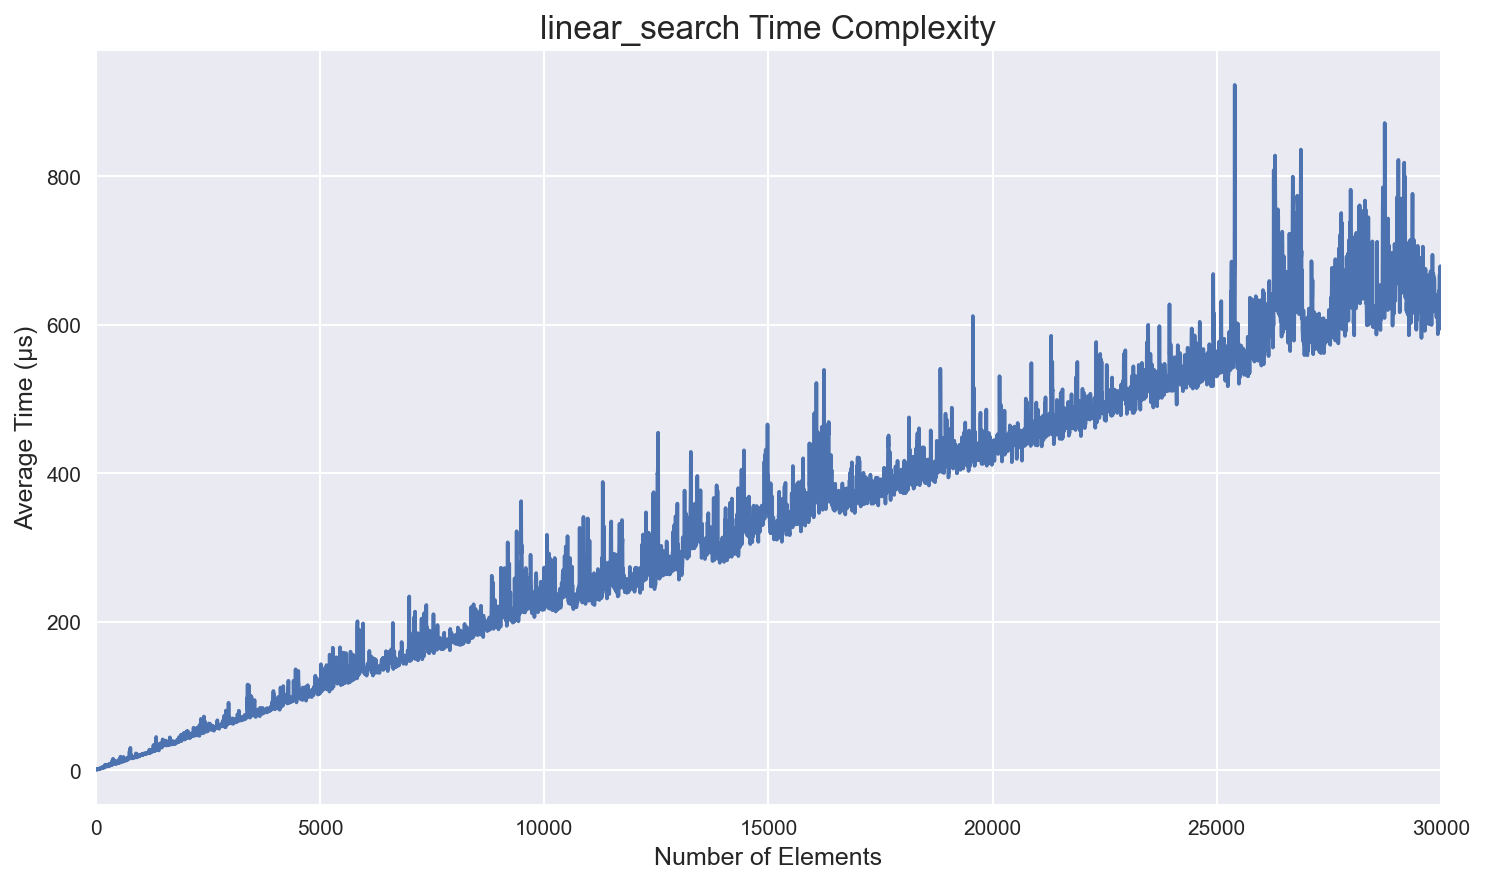

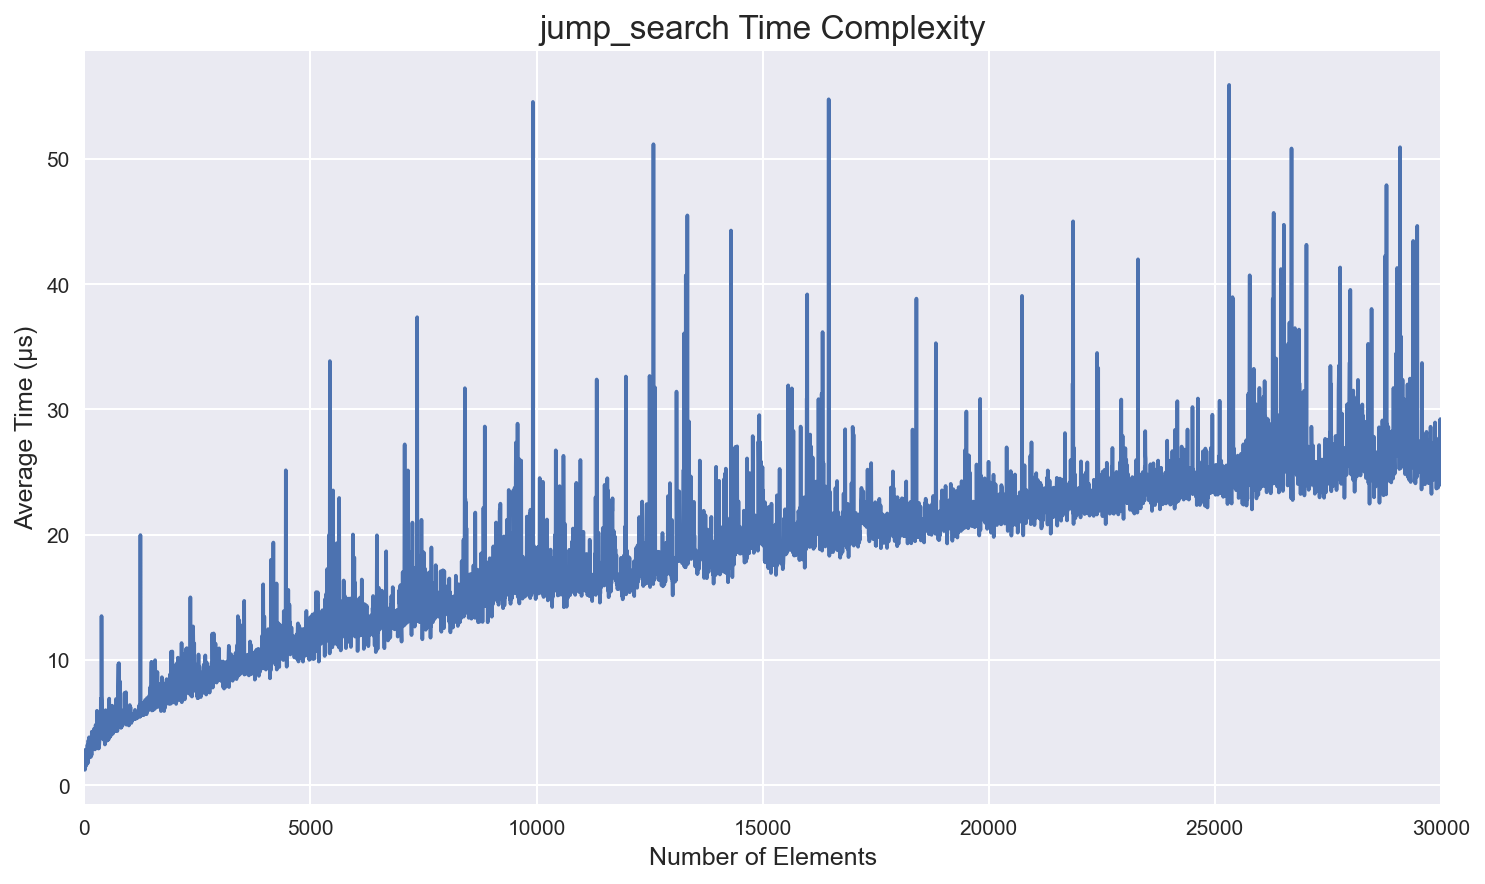

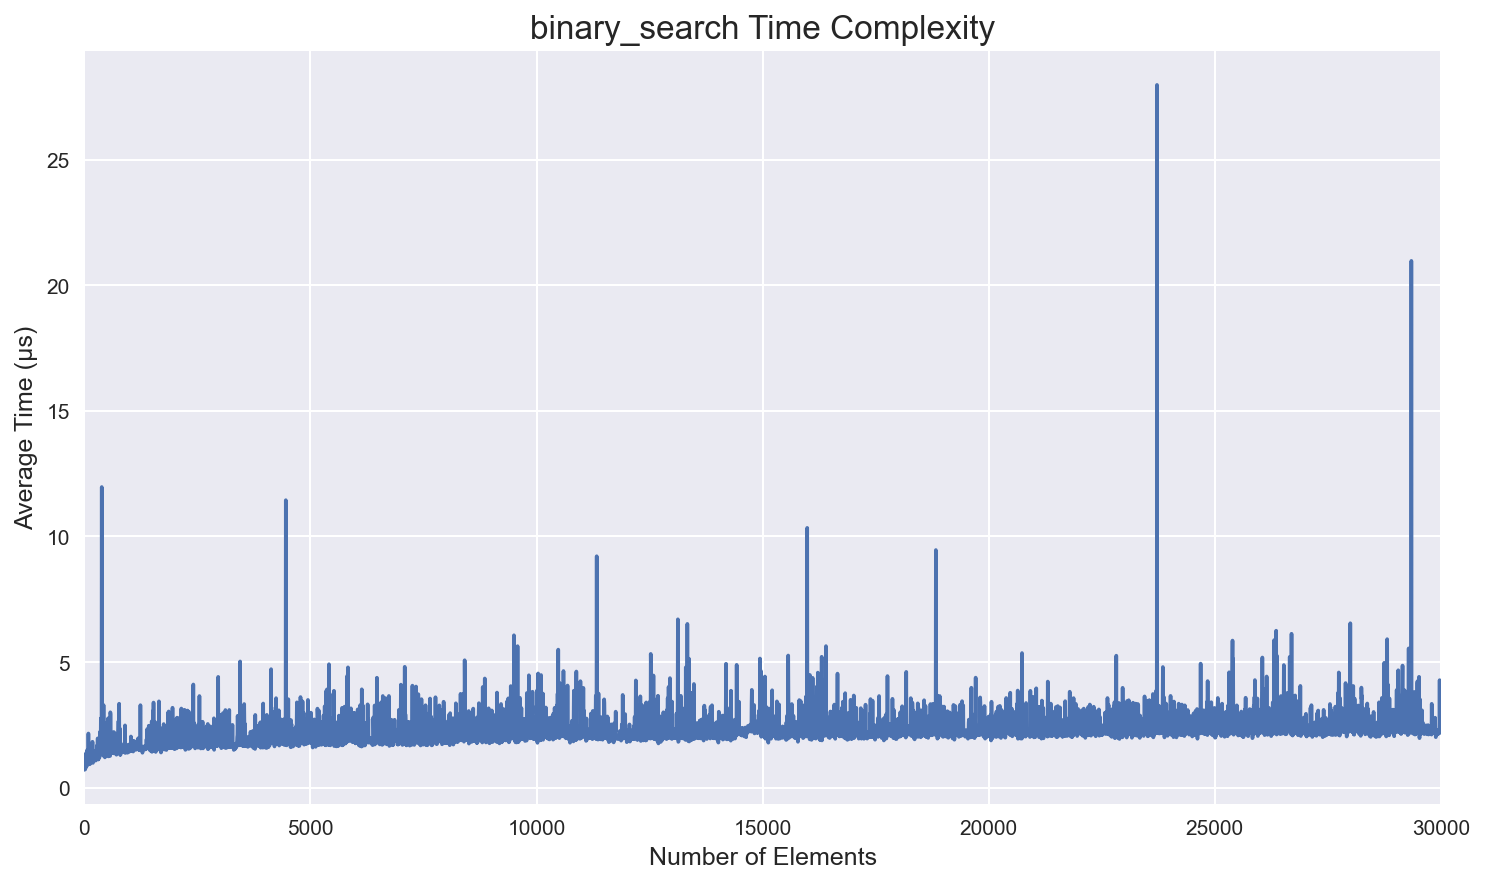

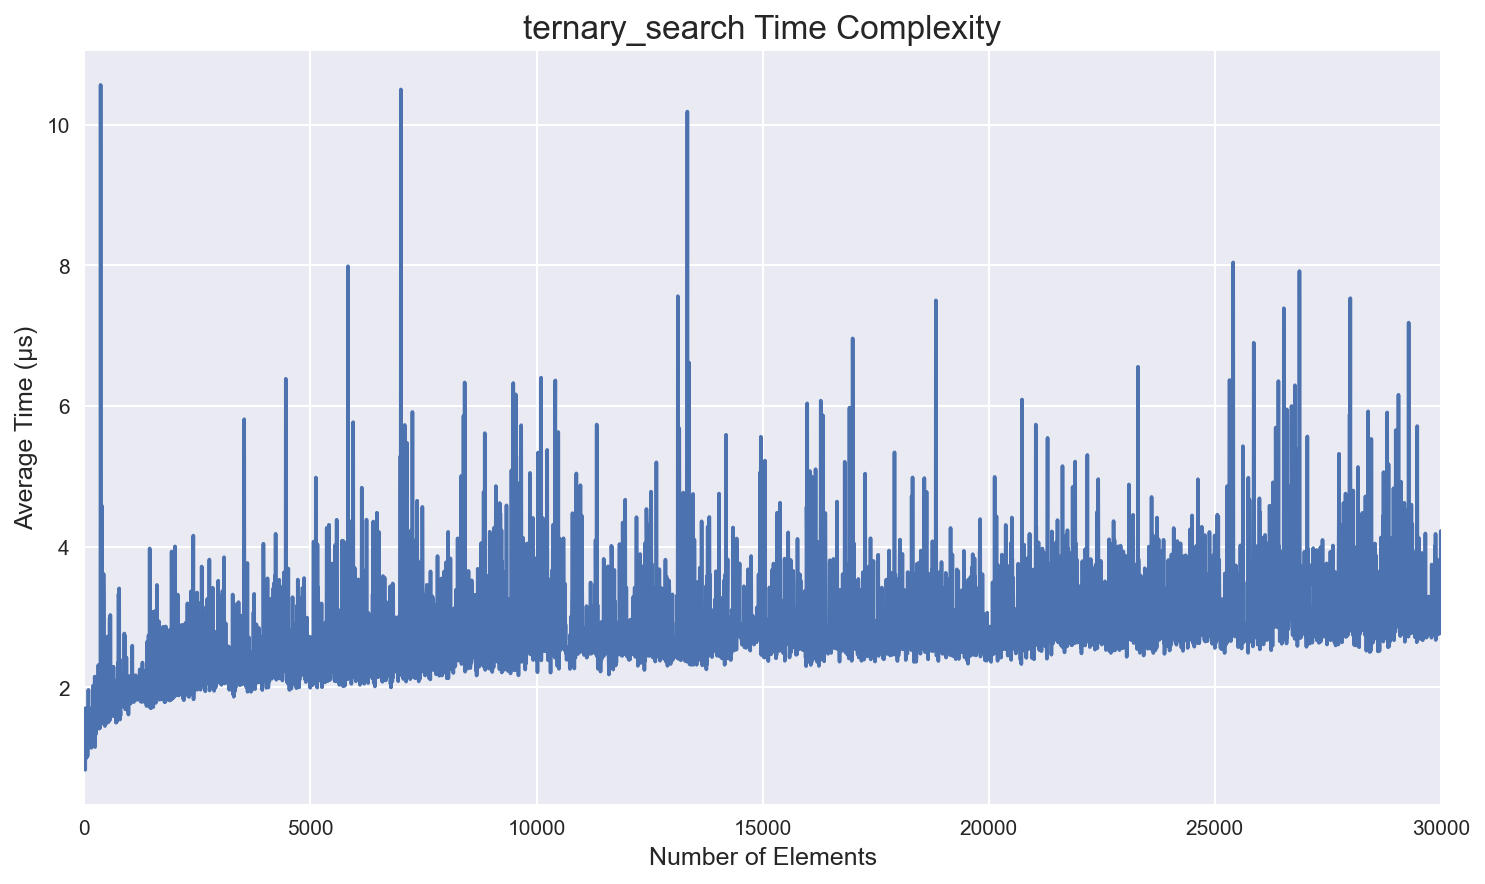

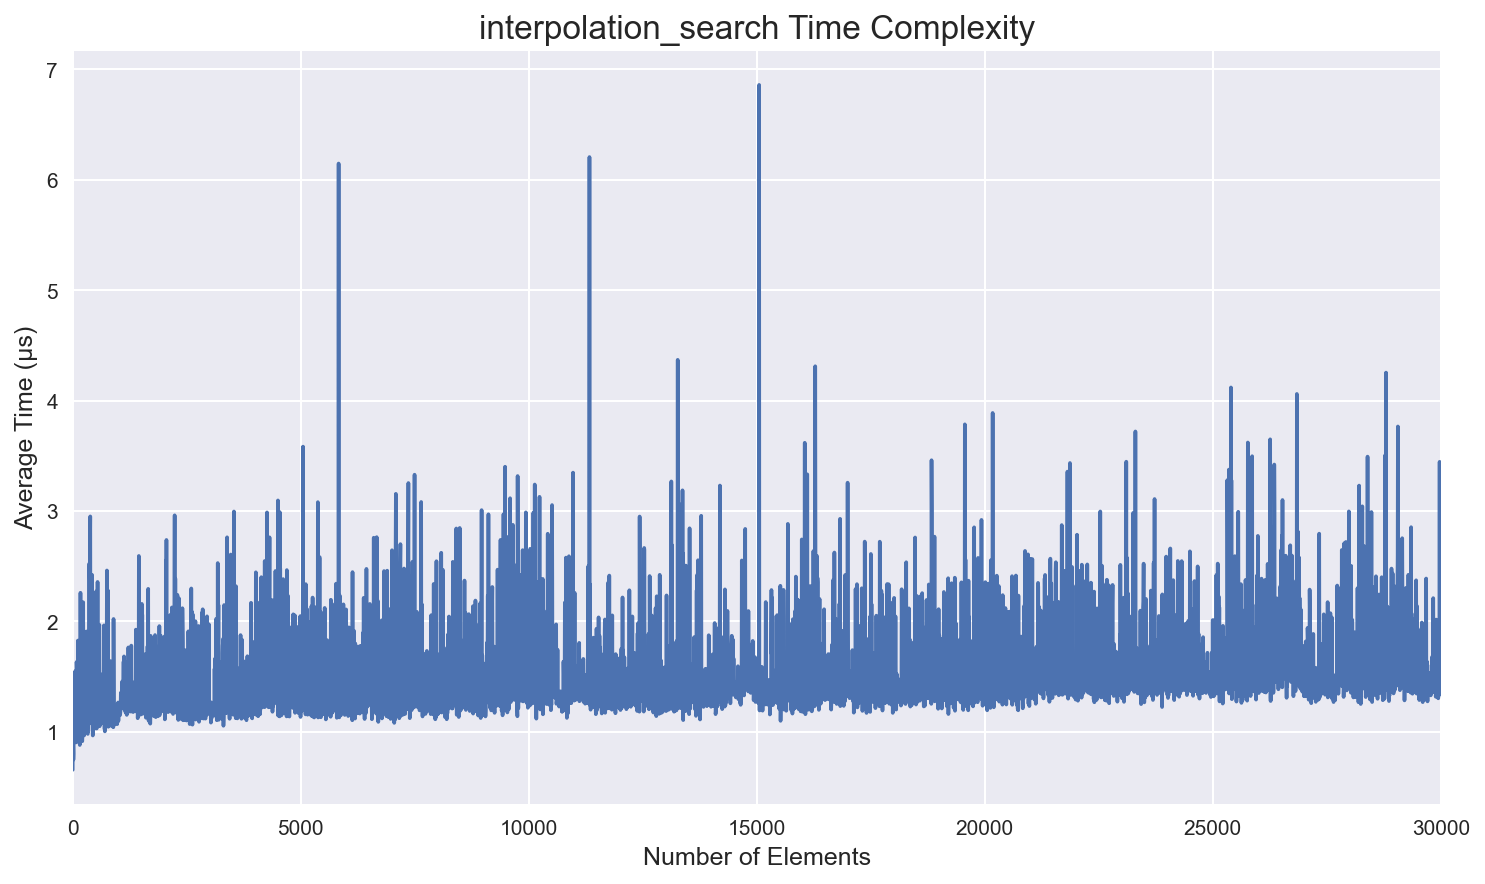

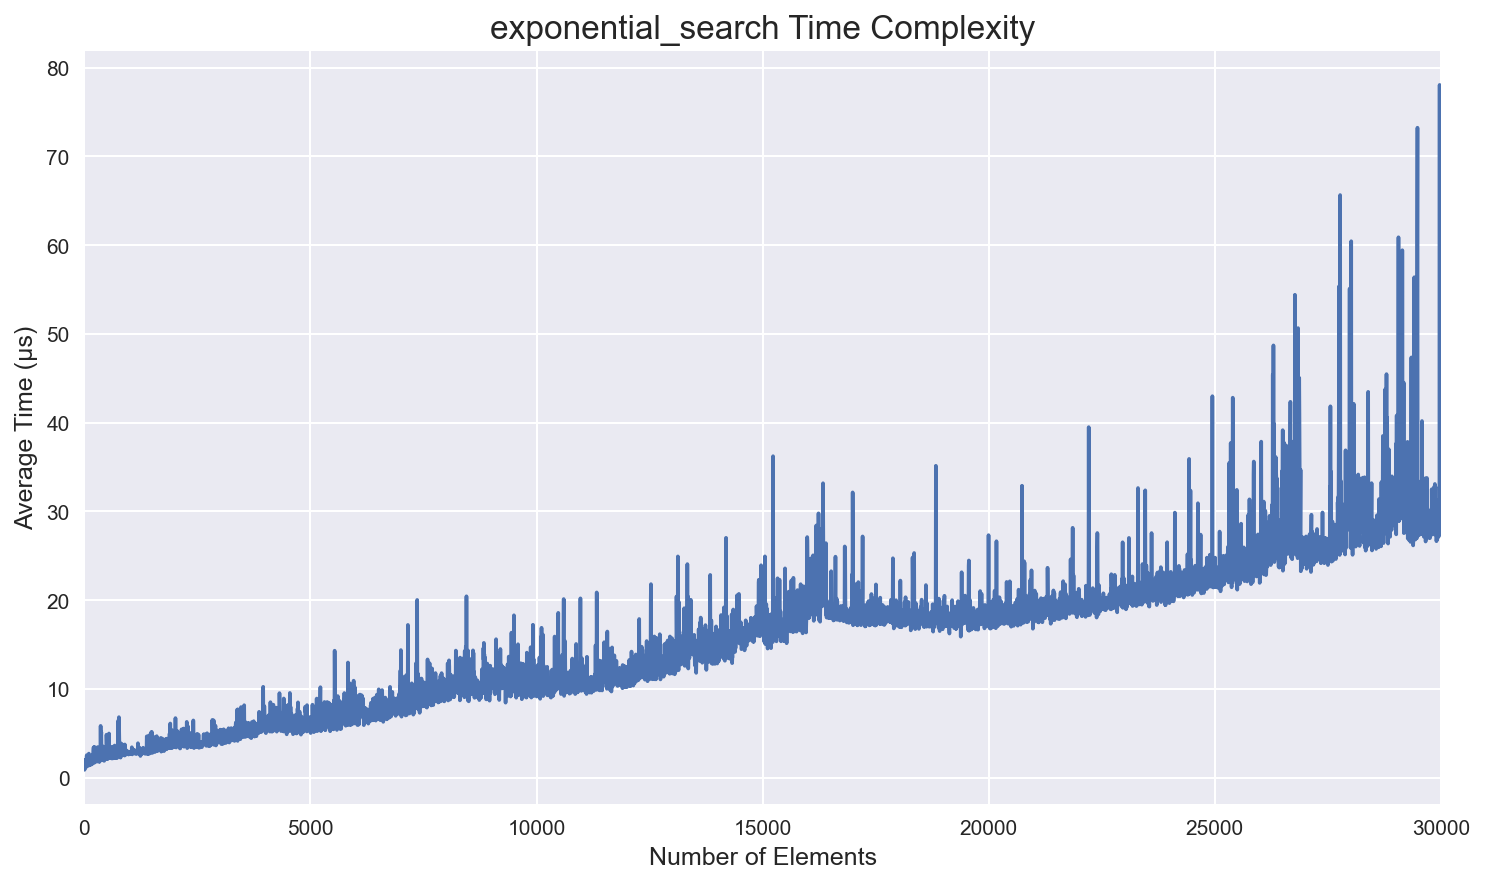

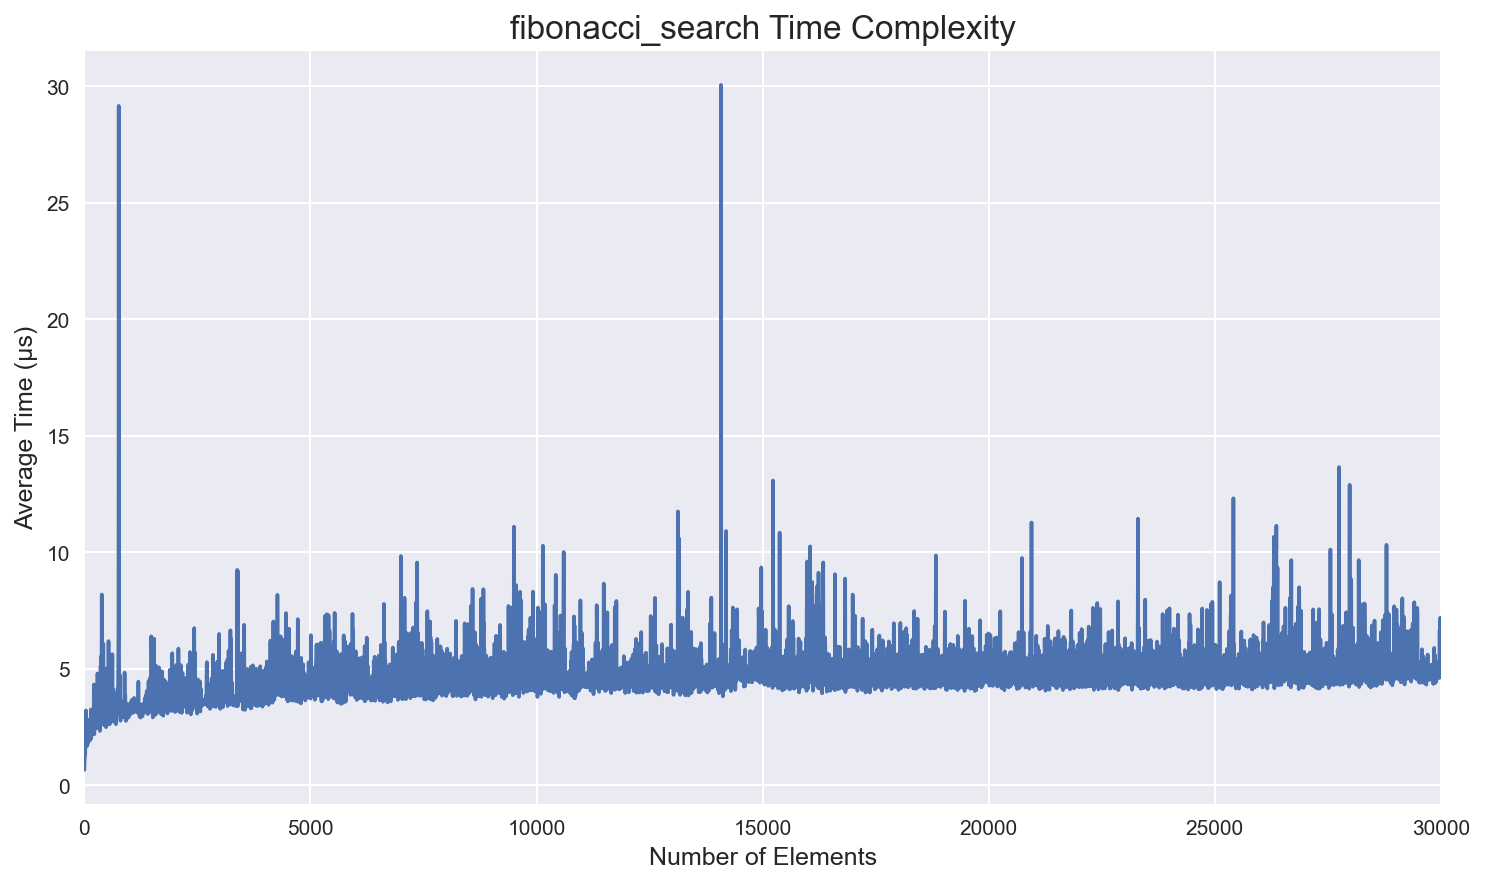

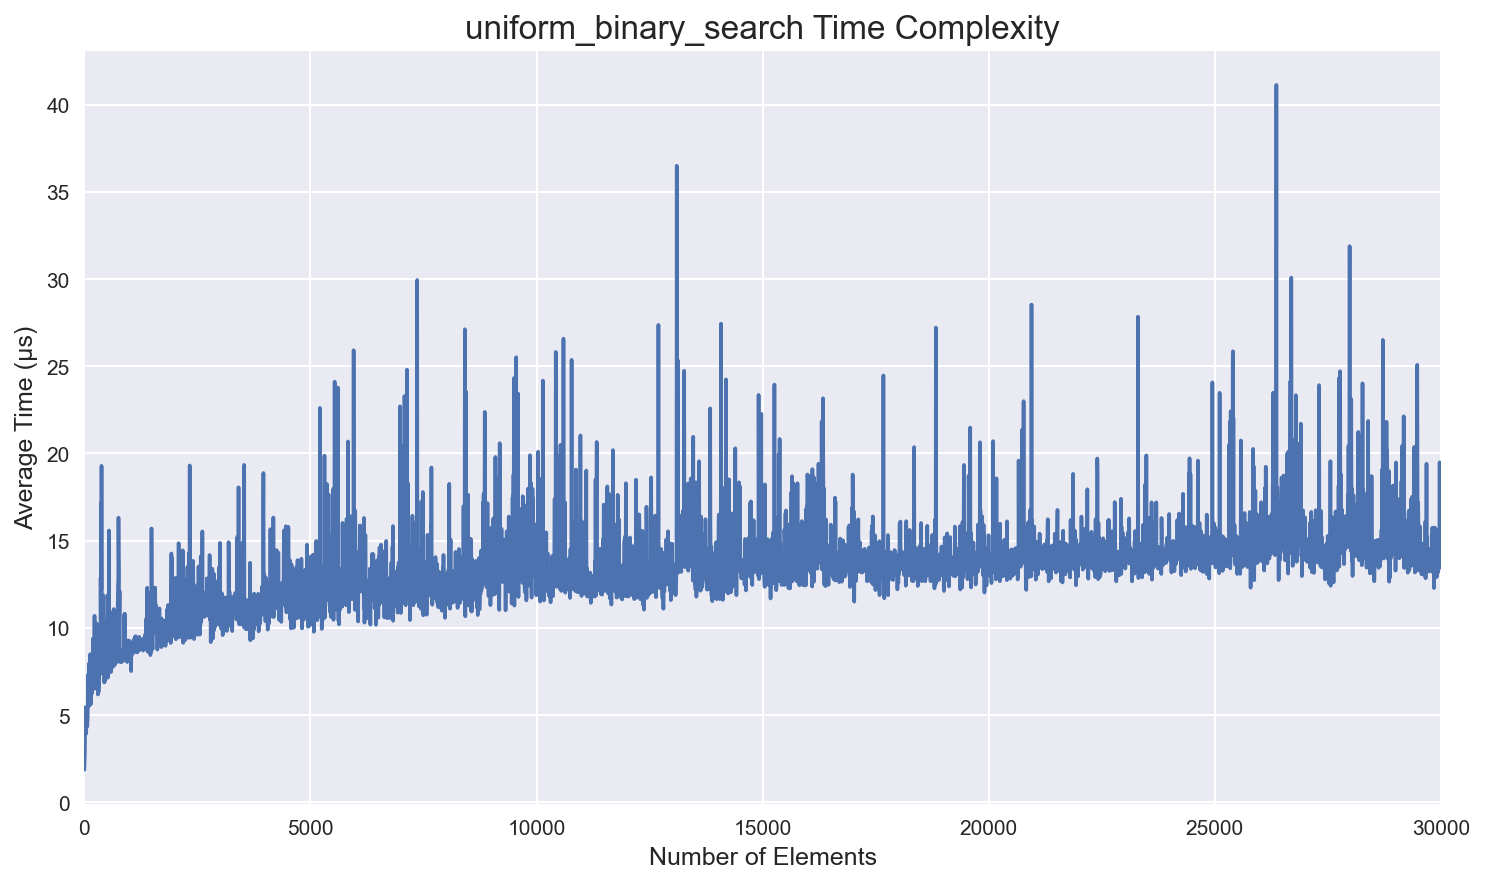

In [13]:
# Set plot style
plt.style.use("seaborn")

# Plot the time complexity for each search algorithm
for search_fn in search_fns:
    arr_size = range(start_size, end_size + 1, step)
    avg_times = average_times[search_fn]

    plt.figure(figsize=(10, 6), dpi=150)

    plt.plot(arr_size, avg_times, markersize=5, label=search_fn.__name__)

    plt.title(f"{search_fn.__name__} Time Complexity", fontsize=16)
    plt.xlabel("Number of Elements", fontsize=12)
    plt.ylabel("Average Time (µs)", fontsize=12)
    plt.xlim([0, end_size])

    plt.grid(True)
    plt.tight_layout()

    plt.show()

### Smoothed Results

The following cell plots the smoothed average time for each search function using the Savitsky-Golay Filter with `window_length=len(average_time)` and `polyorder=2`.


C:\Users\Mr. Pedram\AppData\Local\Temp\ipykernel_11796\3762046838.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


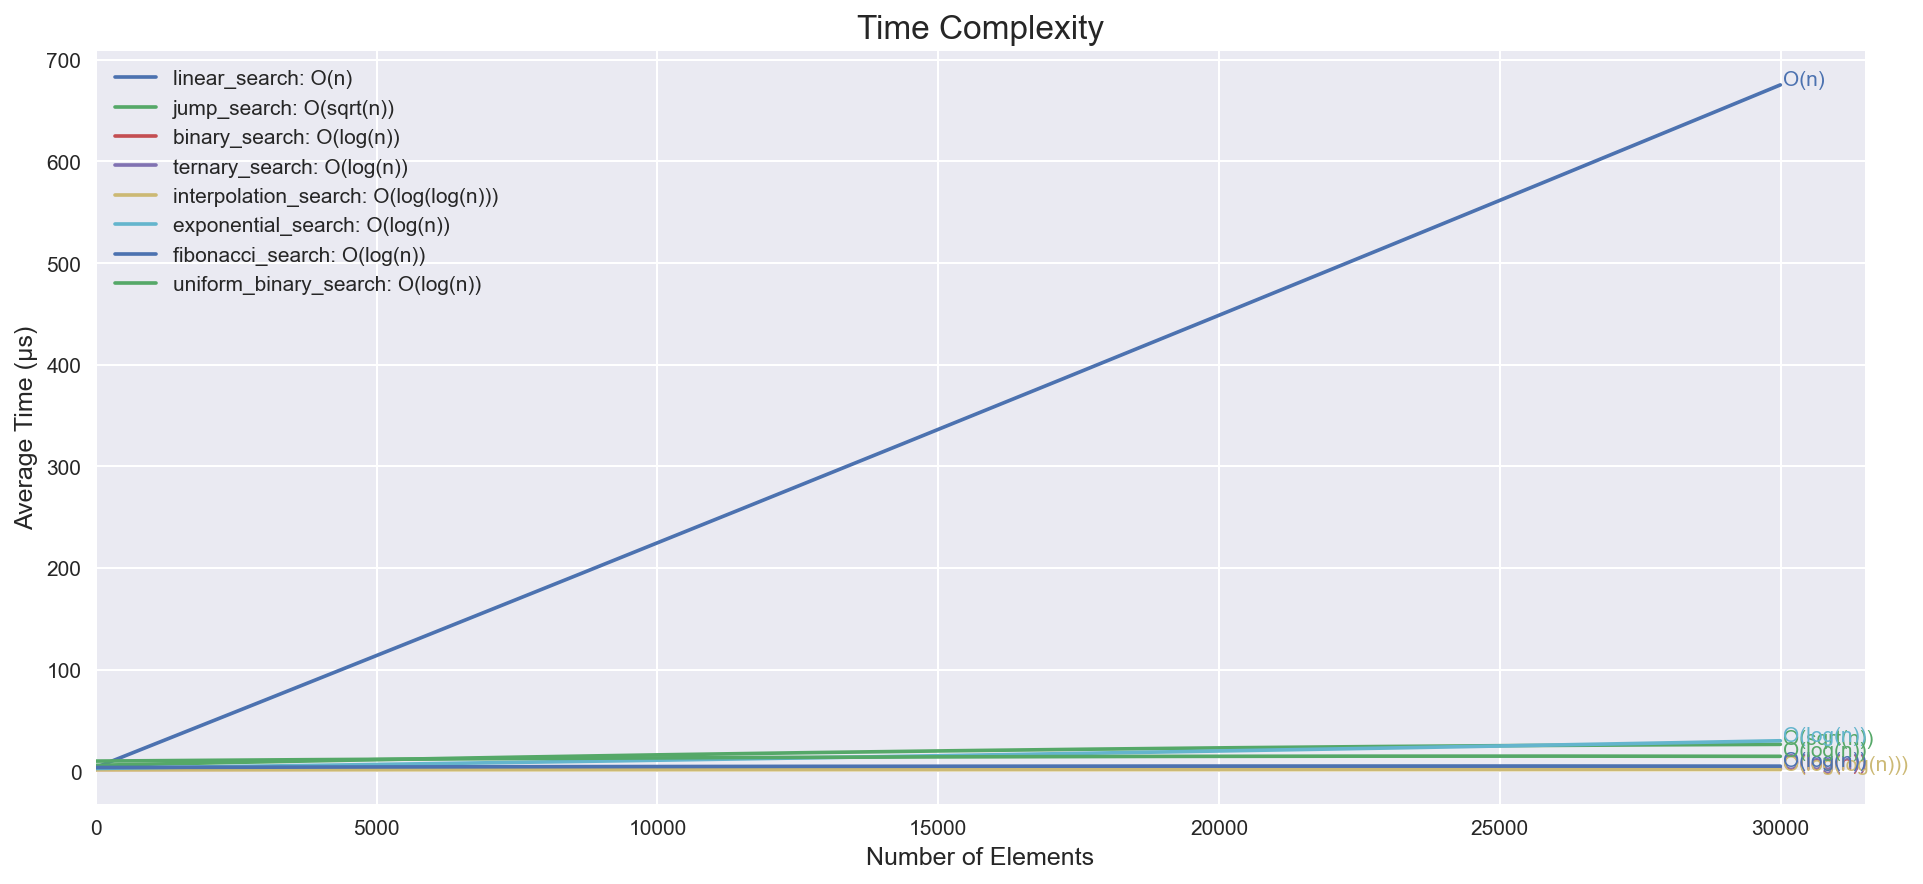

In [15]:
def plot_smoothed_results(time_complexities):
    # Set plot style
    plt.style.use("seaborn")

    # Create the figure and axes
    _, ax = plt.subplots(figsize=(13, 6), dpi=150)

    # Set the title and axis labels
    ax.set_title("Time Complexity", fontsize=16)
    ax.set_xlabel("Number of Elements", fontsize=12)
    ax.set_ylabel("Average Time (µs)", fontsize=12)

    # Plot the time complexity for each search algorithm
    for search_fn, time_complexity in time_complexities.items():
        average_time = average_times[search_fn]

        # Apply Savitzky-Golay filter for smoothing
        smoothed_average_time = savgol_filter(average_time, len(average_time), 2)

        # Plot the smoothed line
        (line,) = ax.plot(arr_size, smoothed_average_time, label=f"{search_fn.__name__}: {time_complexity}")

        # Add the time complexity as text annotation to the line
        x_pos = arr_size[-1] + 50  # Adjust the position of the text
        y_pos = smoothed_average_time[-1]
        ax.text(x_pos, y_pos, time_complexity, fontsize=10, color=line.get_color())

    # Add legend
    ax.legend()
    ax.set_xlim(left = 0)
    # Show the plot
    plt.tight_layout()
    plt.show()


plot_smoothed_results(
    {
        linear_search: "O(n)",
        jump_search: "O(sqrt(n))",
        binary_search: "O(log(n))",
        ternary_search: "O(log(n))",
        interpolation_search: "O(log(log(n)))",
        exponential_search: "O(log(n))",
        fibonacci_search: "O(log(n))",
        uniform_binary_search: "O(log(n))",
    }
)

In order to prioritize algorithms with similar time complexity, we will exclude `linear_search` from the visualization.

C:\Users\Mr. Pedram\AppData\Local\Temp\ipykernel_11796\3762046838.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


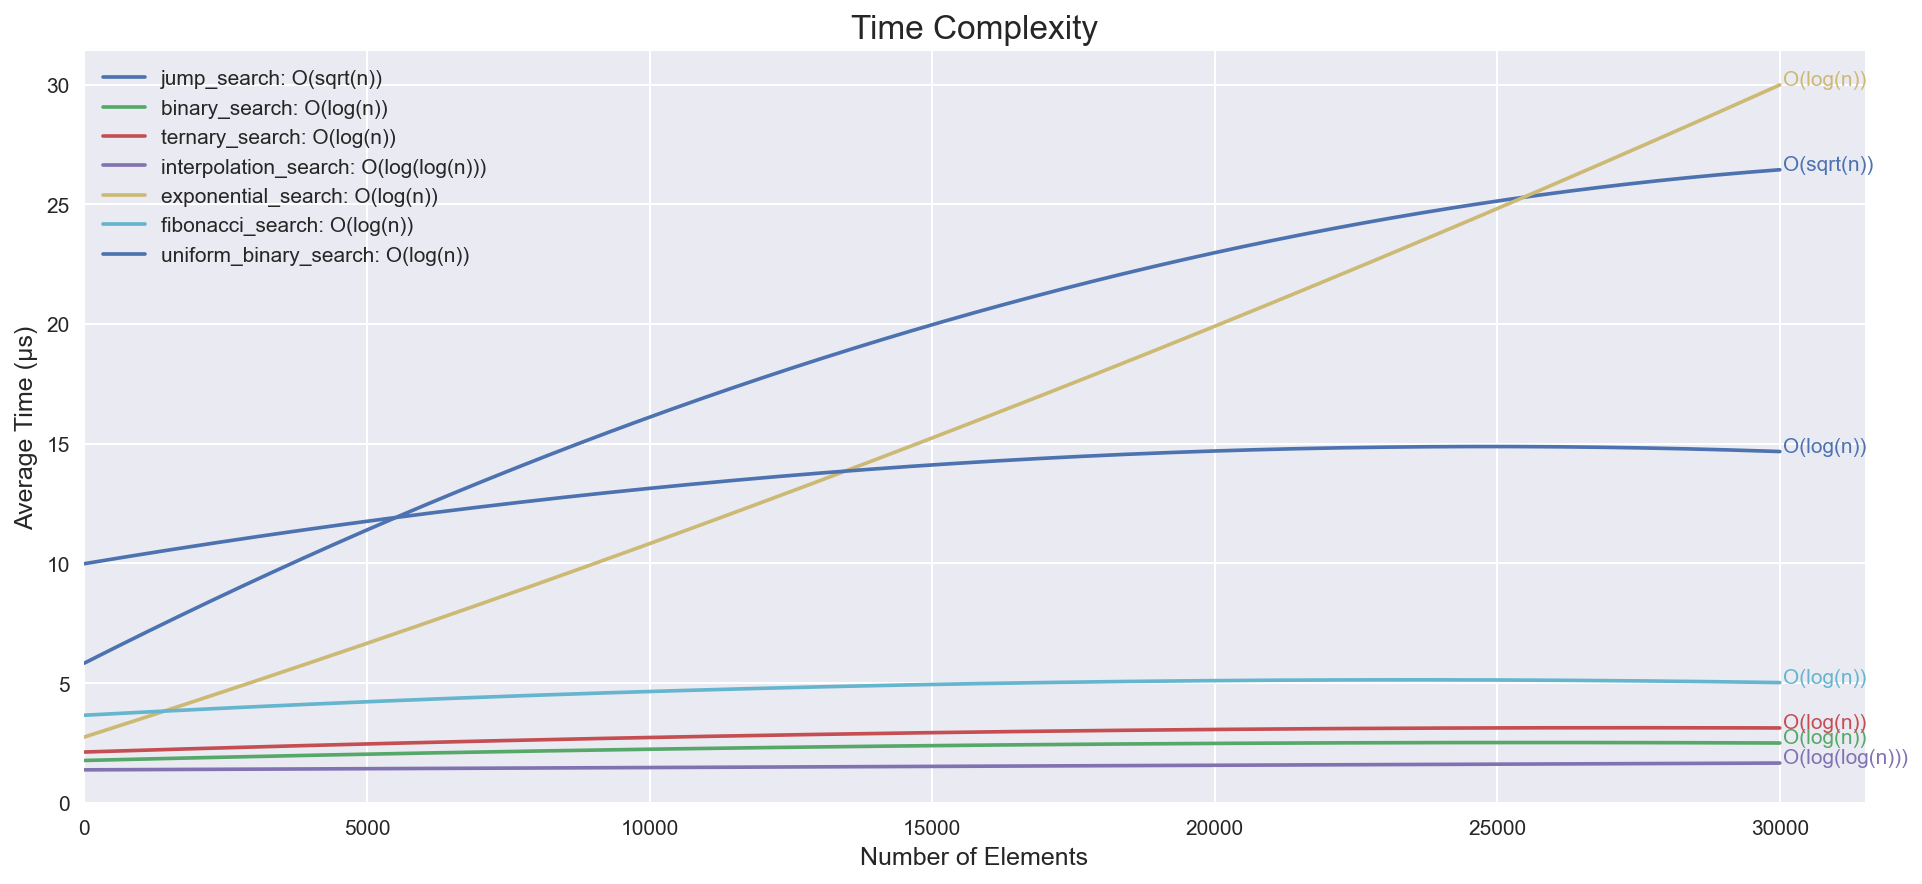

In [16]:
plot_smoothed_results(
    {
        jump_search: "O(sqrt(n))",
        binary_search: "O(log(n))",
        ternary_search: "O(log(n))",
        interpolation_search: "O(log(log(n)))",
        exponential_search: "O(log(n))",
        fibonacci_search: "O(log(n))",
        uniform_binary_search: "O(log(n))",
    }
)

### Conclusions

As we can see in the chart above, Linear Search has the worst performance while Ternary Search, Binary Search, and Interpolation Search have performed the best.